In [1]:
import sympy as sp
import numpy as np
from sympy import cos as c
from sympy import sin as s
from numpy import random as rand
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
t1 = sp.pi/3
t2 = -sp.pi/4
t3 = -sp.pi/6

# Base Functions

In [3]:
def R3(t):
    return np.array([[c(t), s(t),0],
                     [-1*s(t),c(t),0],
                     [0,0,1]])
def R2(t):
    return np.array([[c(t),0,-s(t)],
                     [0,1,0],
                     [s(t),0,c(t)]])
def R1(t):
    return np.array([[1,0,0],
                     [0,c(t), s(t)],
                     [0,-1*s(t),c(t)]])

# Part A.1

In [4]:
def EA123toDCM(t1, t2, t3): # forward map 123 euler angle sequence to DCM
    DCM = np.matmul(R3(t3),np.matmul(R2(t2), R1(t1)))
    return sp.Matrix(DCM)

In [5]:
DCM123 = EA123toDCM(t1, t2, t3).evalf()
DCM123

Matrix([
[ 0.612372435695794, -0.780330085889911, -0.126826484044322],
[ 0.353553390593274,  0.126826484044322,  0.926776695296637],
[-0.707106781186548, -0.612372435695794,  0.353553390593274]])

In [6]:
sp.Matrix(np.ceil(np.matmul(DCM123,DCM123.transpose())))

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

# Part A.2

In [7]:
p1, p2, p3 = sp.symbols('phi_1 phi_2 phi_3')
DCM323 = np.matmul(R3(p3), np.matmul(R2(p2), R3(p1)))
sp.Matrix(DCM323)

Matrix([
[-sin(phi_1)*sin(phi_3) + cos(phi_1)*cos(phi_2)*cos(phi_3),  sin(phi_1)*cos(phi_2)*cos(phi_3) + sin(phi_3)*cos(phi_1), -sin(phi_2)*cos(phi_3)],
[-sin(phi_1)*cos(phi_3) - sin(phi_3)*cos(phi_1)*cos(phi_2), -sin(phi_1)*sin(phi_3)*cos(phi_2) + cos(phi_1)*cos(phi_3),  sin(phi_2)*sin(phi_3)],
[                                    sin(phi_2)*cos(phi_1),                                     sin(phi_1)*sin(phi_2),             cos(phi_2)]])

In [8]:
def DCMtoEA323(DCM):
    p1 = sp.atan2(DCM[2][1],DCM[2][0]).evalf()
    p2 = sp.acos(DCM[2][2]).evalf()
    p3 = sp.atan2(DCM[1][2], -DCM[0][2]).evalf()
    return np.array([p1,p2,p3])

# Part A.3

In [9]:
EA323 = DCMtoEA323(np.array(DCM123))
EA323*(180/np.pi)

array([-139.106605350869, 69.2951889453646, 82.2076542985965],
      dtype=object)

# Part A.4

In [10]:
def EA323toDCM(t1, t2, t3):
    DCM = np.matmul(R3(t3), np.matmul(R2(t2), R3(t1)))
    return sp.Matrix(DCM)

In [11]:
DCM323 = EA323toDCM(EA323[0], EA323[1], EA323[2]).evalf()
DCM323

Matrix([
[ 0.612372435695794, -0.780330085889911, -0.126826484044322],
[ 0.353553390593274,  0.126826484044322,  0.926776695296637],
[-0.707106781186548, -0.612372435695794,  0.353553390593274]])

# Part B.1

In [12]:
BN = np.array(DCM123)

In [13]:
def DCMtoPRP(DCM):
    theta = sp.acos(0.5*(DCM[0][0]+DCM[1][1]+DCM[2][2]-1))
    lamHat = (1/(2*sp.sin(theta))) * np.array([DCM[1][2]-DCM[2][1],
                                              DCM[2][0]-DCM[0][2],
                                              DCM[0][1]-DCM[1][0]])
    return (theta, lamHat)

In [14]:
DCMtoPRP(BN)

(1.52440353161632,
 array([0.770403483220371, -0.290452661903053, -0.567552397788389],
       dtype=object))

In [15]:
def allPRPs(PRPVec):
    return (PRPVec,
            (-PRPVec[0], -PRPVec[1]),
           ((PRPVec[0]-(2*sp.pi)).evalf(), PRPVec[1]),
           (((2*sp.pi)-PRPVec[0]).evalf(), -PRPVec[1]))

In [16]:
allPRPs(DCMtoPRP(BN))

((1.52440353161632,
  array([0.770403483220371, -0.290452661903053, -0.567552397788389],
        dtype=object)),
 (-1.52440353161632,
  array([-0.770403483220371, 0.290452661903053, 0.567552397788389],
        dtype=object)),
 (-4.75878177556327,
  array([0.770403483220371, -0.290452661903053, -0.567552397788389],
        dtype=object)),
 (4.75878177556327,
  array([-0.770403483220371, 0.290452661903053, 0.567552397788389],
        dtype=object)))

# Part B.2

In [17]:
def DCMtoEP(DCM): # Sheppard's method
    e1sq = (1/4)*(1+(2*DCM[0][0])-np.trace(DCM))
    e2sq = (1/4)*(1+(2*DCM[1][1])-np.trace(DCM))
    e3sq = (1/4)*(1+(2*DCM[2][2])-np.trace(DCM))
    e4sq = (1/4)*(1+np.trace(DCM))
        
    if np.max([e1sq, e2sq, e3sq, e4sq]) == e1sq:
        eps = (1/(4*sp.sqrt(e1sq))) * np.array([4*e1sq,DCM[0][1]+DCM[1][0],DCM[2][0]+DCM[0][2],DCM[1][2]-DCM[2][1]])
    elif np.max([e1sq, e2sq, e3sq, e4sq]) == e2sq:
        eps = (1/(4*sp.sqrt(e2sq))) * np.array([DCM[0][1]+DCM[1][0],4*e2sq,DCM[1][2]+DCM[2][1],DCM[2][0]-DCM[0][2]])
    elif np.max([e1sq, e2sq, e3sq, e4sq]) == e3sq:
        eps = (1/(4*sp.sqrt(e3sq))) * np.array([DCM[2][0]+DCM[0][2],DCM[1][2]+DCM[2][1],4*e3sq,DCM[0][1]-DCM[1][0]])
    elif np.max([e1sq, e2sq, e3sq, e4sq]) == e4sq:
        eps = (1/(4*sp.sqrt(e4sq))) * np.array([DCM[1][2]-DCM[2][1],DCM[2][0]-DCM[0][2],DCM[0][1]-DCM[1][0],4*e4sq])
    
    if eps[3] < 0:
        return -1*eps
    else:
        return eps

In [18]:
DCMtoEP(BN)

array([0.531975695182167, -0.200562121146575, -0.391903837329120,
       0.723317411364712], dtype=object)

In [19]:
np.linalg.norm(np.float64(np.array(DCMtoEP(BN))))

1.0

# Part B.3

In [20]:
def DCMtoCRP(DCM):
    theta, lamHat = DCMtoPRP(DCM)
    rho = lamHat*sp.tan(theta/2)
    return rho

In [21]:
DCMtoCRP(BN)

array([0.735466458879328, -0.277280925352214, -0.541814466472886],
      dtype=object)

# Part B.4

In [22]:
def DCMtoMRP(DCM):
    theta, lamHat = DCMtoPRP(DCM)
    sigma = lamHat*sp.tan(theta/4)
    return sigma

In [23]:
DCMtoMRP(BN)

array([0.308692810548981, -0.116381416344972, -0.227412451556888],
      dtype=object)

# Part B.5

In [24]:
def PRPtoDCM(PRP):
    th, lh = PRP
    
    DCM = np.array([[((lh[0]**2)*(1-c(th)) + c(th)), ((lh[0]*lh[1])*(1-c(th)) + (lh[2]*s(th))), ((lh[0]*lh[2])*(1-c(th)) - (lh[1]*s(th)))],
                  [((lh[1]*lh[0])*(1-c(th)) - (lh[2]*s(th))), ((lh[1]**2)*(1-c(th)) + c(th)), ((lh[1]*lh[2])*(1-c(th)) + (lh[0]*s(th)))],
                  [((lh[2]*lh[0])*(1-c(th)) + (lh[1]*s(th))), ((lh[2]*lh[1])*(1-c(th)) - (lh[0]*s(th))), ((lh[2]**2)*(1-c(th)) + c(th))]])
    return sp.Matrix(DCM)

In [25]:
PRPtoDCM(DCMtoPRP(BN))

Matrix([
[ 0.612372435695794, -0.780330085889911, -0.126826484044322],
[ 0.353553390593274,  0.126826484044322,  0.926776695296637],
[-0.707106781186548, -0.612372435695794,  0.353553390593274]])

In [26]:
def EPtoDCM(E):
    DCM = np.array([[1-(2*E[1]**2) - (2*E[2]**2), 2*(E[0]*E[1] + E[2]*E[3]), 2*(E[0]*E[2] - E[1]*E[3])],
                  [2*(E[0]*E[1] - E[2]*E[3]), 1-(2*E[0]**2) - (2*E[2]**2), 2*(E[1]*E[2] + E[0]*E[3])],
                  [2*(E[0]*E[2] + E[1]*E[3]), 2*(E[1]*E[2] - E[0]*E[3]), 1-(2*E[0]**2) - (2*E[1]**2)]])
    return sp.Matrix(DCM)

In [27]:
EPtoDCM(DCMtoEP(BN))

Matrix([
[ 0.612372435695794, -0.780330085889911, -0.126826484044322],
[ 0.353553390593274,  0.126826484044322,  0.926776695296637],
[-0.707106781186548, -0.612372435695794,  0.353553390593274]])

In [28]:
def CRPtoDCM(CRP):
    eps4 = 1/sp.sqrt(1+ np.dot(CRP, CRP))
    eps13 = CRP/sp.sqrt(1+ np.dot(CRP, CRP))
    return EPtoDCM(np.array([eps13[0],eps13[1],eps13[2],eps4]))

In [29]:
CRPtoDCM(DCMtoCRP(BN))

Matrix([
[ 0.612372435695794, -0.780330085889911, -0.126826484044322],
[ 0.353553390593274,  0.126826484044322,  0.926776695296637],
[-0.707106781186548, -0.612372435695794,  0.353553390593274]])

In [30]:
def MRPtoDCM(MRP):
    eps4 = (1-np.dot(MRP, MRP))/(1+np.dot(MRP, MRP))
    eps13 = (2*MRP)/(1+np.dot(MRP, MRP))
    return EPtoDCM(np.array([eps13[0],eps13[1],eps13[2],eps4]))

In [31]:
MRPtoDCM(DCMtoMRP(BN))

Matrix([
[ 0.612372435695794,  -0.78033008588991, -0.126826484044322],
[ 0.353553390593274,  0.126826484044322,  0.926776695296637],
[-0.707106781186547, -0.612372435695794,  0.353553390593274]])

# Part C.1

In [32]:
lamHat = np.array([1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)])
n = 50
mu = np.pi
std = 1e-6

In [33]:
def DCMtoEP_standard(DCM):
    theta, lamHat = DCMtoPRP(DCM)
    eps13 = lamHat*sp.sin(theta/2).evalf()
    eps4 = sp.cos(theta/2).evalf()
    
    if eps4 < 0:
        return -1* np.array([eps13[0],eps13[1],eps13[2],eps4])
    else:
        return np.array([eps13[0],eps13[1],eps13[2],eps4])

In [34]:
the = rand.normal(mu, std, n)

Text(0.5, 1.0, 'Normal Distribution of $\\theta$')

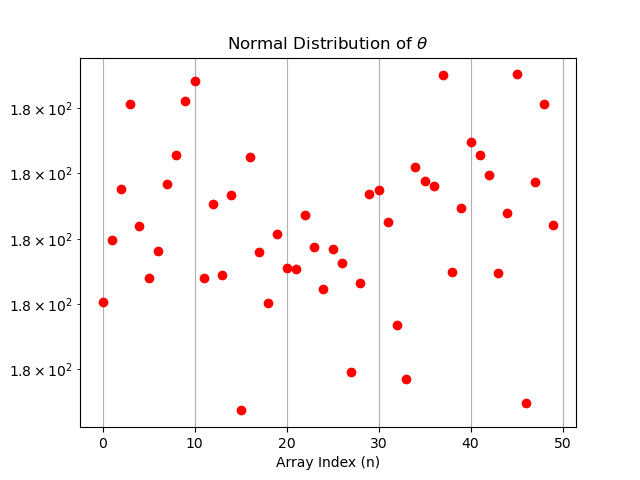

In [35]:
plt.figure()
plt.semilogy(np.degrees(the), 'ro')
plt.grid()
plt.xlabel("Array Index (n)")
plt.ylabel(r'$\theta_{i}$ Deviation From 180deg (Deg)')
plt.title(r'Normal Distribution of $\theta$')

In [36]:
def eps_true(lhat, the):
        eps13 = lhat * sp.sin(the/2)
        eps4 = sp.cos(the/2)
        
        if eps4 < 0:
            return -1* np.array([eps13[0],eps13[1],eps13[2],eps4])
        else:
            return np.array([eps13[0],eps13[1],eps13[2],eps4])

In [37]:
errStd = []
errShp = []

for theta in the:
    eTru = eps_true(lamHat, theta)
    estd = DCMtoEP_standard(np.array(PRPtoDCM((theta, lamHat)), dtype=np.float64))
    eshp = DCMtoEP(np.array(PRPtoDCM((theta, lamHat)), dtype=np.float64))
    errStd.append(np.linalg.norm(np.array(eTru - estd, dtype=np.float64)))
    errShp.append(np.linalg.norm(np.array(eTru - eshp, dtype=np.float64)))

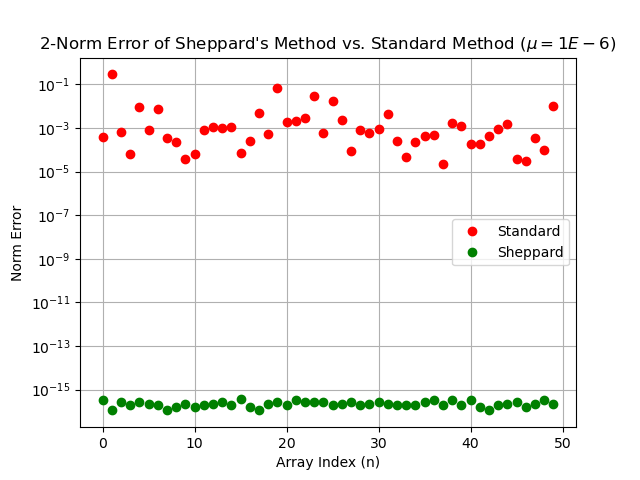

In [38]:
plt.figure()
plt.semilogy(errStd, 'ro')
plt.semilogy(errShp, 'go')
plt.xlabel("Array Index (n)")
plt.ylabel("Norm Error")
plt.grid()
plt.title("2-Norm Error of Sheppard's Method vs. Standard Method ($\mu = 1E-6$)")
plt.legend(["Standard", "Sheppard"])

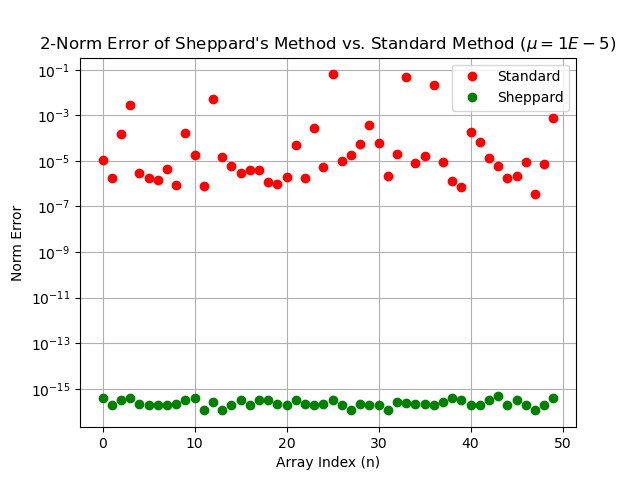

In [39]:
lamHat = np.array([1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)])
n = 50
mu = np.pi
std = 1e-5
the = rand.normal(mu, std, n)

errStd = []
errShp = []

for theta in the:
    eTru = eps_true(lamHat, theta)
    estd = DCMtoEP_standard(np.array(PRPtoDCM((theta, lamHat)), dtype=np.float64))
    eshp = DCMtoEP(np.array(PRPtoDCM((theta, lamHat)), dtype=np.float64))
    errStd.append(np.linalg.norm(np.array(eTru - estd, dtype=np.float64)))
    errShp.append(np.linalg.norm(np.array(eTru - eshp, dtype=np.float64)))
    
plt.figure()
plt.semilogy(errStd, 'ro')
plt.semilogy(errShp, 'go')
plt.xlabel("Array Index (n)")
plt.ylabel("Norm Error")
plt.grid()
plt.title("2-Norm Error of Sheppard's Method vs. Standard Method ($\mu = 1E-5$)")
plt.legend(["Standard", "Sheppard"])

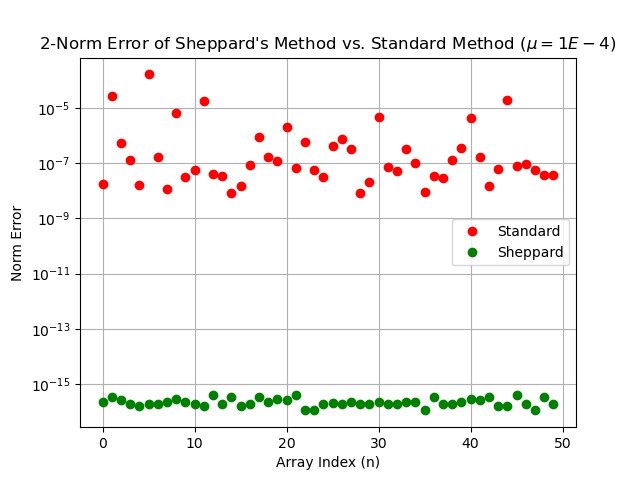

In [40]:
lamHat = np.array([1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)])
n = 50
mu = np.pi
std = 1e-4
the = rand.normal(mu, std, n)

errStd = []
errShp = []

for theta in the:
    eTru = eps_true(lamHat, theta)
    estd = DCMtoEP_standard(np.array(PRPtoDCM((theta, lamHat)), dtype=np.float64))
    eshp = DCMtoEP(np.array(PRPtoDCM((theta, lamHat)), dtype=np.float64))
    errStd.append(np.linalg.norm(np.array(eTru - estd, dtype=np.float64)))
    errShp.append(np.linalg.norm(np.array(eTru - eshp, dtype=np.float64)))
    
plt.figure()
plt.semilogy(errStd, 'ro')
plt.semilogy(errShp, 'go')
plt.xlabel("Array Index (n)")
plt.ylabel("Norm Error")
plt.grid()
plt.title("2-Norm Error of Sheppard's Method vs. Standard Method ($\mu = 1E-4$)")
plt.legend(["Standard", "Sheppard"])

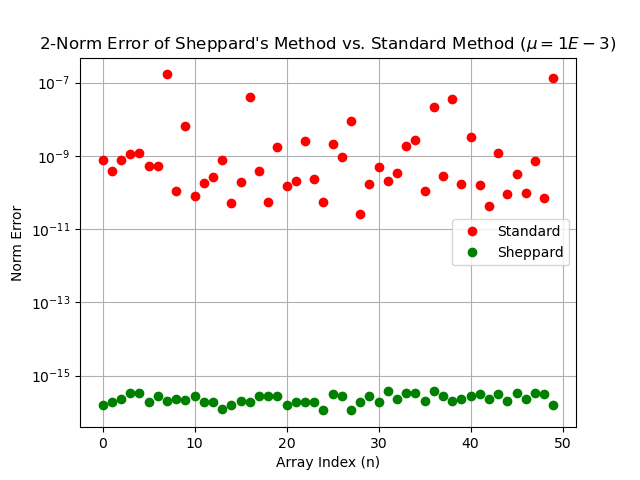

In [41]:
lamHat = np.array([1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)])
n = 50
mu = np.pi
std = 1e-3
the = rand.normal(mu, std, n)

errStd = []
errShp = []

for theta in the:
    eTru = eps_true(lamHat, theta)
    estd = DCMtoEP_standard(np.array(PRPtoDCM((theta, lamHat)), dtype=np.float64))
    eshp = DCMtoEP(np.array(PRPtoDCM((theta, lamHat)), dtype=np.float64))
    errStd.append(np.linalg.norm(np.array(eTru - estd, dtype=np.float64)))
    errShp.append(np.linalg.norm(np.array(eTru - eshp, dtype=np.float64)))
    
plt.figure()
plt.semilogy(errStd, 'ro')
plt.semilogy(errShp, 'go')
plt.xlabel("Array Index (n)")
plt.ylabel("Norm Error")
plt.grid()
plt.title("2-Norm Error of Sheppard's Method vs. Standard Method ($\mu = 1E-3$)")
plt.legend(["Standard", "Sheppard"])